Traditional programming relies on explicitly defining rules and conditions for a program to follow, which works well for many problems. However, image classification poses a significant challenge for traditional programming techniques. It is extremely difficult for a programmer to define rules that can accurately classify a diverse range of images, especially when considering unseen images.

Deep learning provides a solution to this problem. It excels at pattern recognition through a trial-and-error approach. By training a deep neural network with abundant data and giving it feedback on its performance during the training process, the network can gradually establish its own conditions for making accurate classifications. This iterative process allows the network to learn from the data and improve its ability to classify images effectively.

# IMPORT

In [ ]:
from PIL import Image
import numpy as np
import sys
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers, optimizers
from keras.applications import ResNet50
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import load_model

# Fetch the dataset from Kaggle

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
# upload json file into colab
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"randfahad","key":"22b326183c22a2c4b06c0fb3fa421029"}'}

In [ ]:
 #Make a directory named “.kaggle”
!mkdir ~/.kaggle

In [ ]:
 #Copy the “kaggle.json” into this new directory
 ! cp kaggle.json ~/.kaggle/

In [ ]:
 #Allocate the required permission for this file.

 ! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download the dog-emotions-prediction dataset
! kaggle datasets download  devzohaib/dog-emotions-prediction

 95% 361M/379M [00:02<00:00, 150MB/s]
100% 379M/379M [00:02<00:00, 158MB/s]


In [ ]:
# unzip the dataset
!unzip dog-emotions-prediction.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/relaxed/7589753254_ee8544b568_b.jpg  
  inflating: images/relaxed/759543680_39c2ae5902_b.jpg  
  inflating: images/relaxed/7609431744_595047309c_b.jpg  
  inflating: images/relaxed/7613797848_52b6e2a4ac_b.jpg  
  inflating: images/relaxed/7618277504_12a9e58577_b.jpg  
  inflating: images/relaxed/7623026172_ee5fc5af84_b.jpg  
  inflating: images/relaxed/7623956526_5c55bfee35_b.jpg  
  inflating: images/relaxed/7630905134_0993274875_b.jpg  
  inflating: images/relaxed/7650586470_bab16e618f_b.jpg  
  inflating: images/relaxed/7650586740_f0a1e71f48_b.jpg  
  inflating: images/relaxed/7650587218_e8b69b8453_b.jpg  
  inflating: images/relaxed/7653104926_b172a2fc23_b.jpg  
  inflating: images/relaxed/7654628694_ca31b3633d_b.jpg  
  inflating: images/relaxed/7655545926_1288ab5e93_b.jpg  
  inflating: images/relaxed/7659667864_2b1d26a896_b.jpg  
  inflating: images/relaxed/7662075476_bc5b0b0ddf_b.jpg  
  inflating: images/re

# READ THE IMAGES IN DATASET

In [ ]:
CATEGORIES = ["angry", "happy", "relaxed", "sad"]

In [ ]:

# read the images in each folder and store it into array
def createFileList(myDir,format=".jpg"): # the directory path where the images are stored + ".jpg" image format
# Inside the createFileList function, three empty lists are initialized: 
    fileList = []
    labels = []
    names = []
    for root, dirs, files in os.walk(myDir, topdown=True): #The function uses os.walk to traverse through the directory tree starting from myDir. It goes through all subdirectories, and for each file ending with the specified format (".jpg"), it does the following:
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name) # is created by joining the root directory and the file name.
                fileList.append(fullName)
                theFolderName=os. path. basename(root) #theFolderName is extracted, which seems to be the label (emotional state) based on the directory name.
                labels.append(theFolderName) #labels is updated with the emotional state corresponding to the image.



    return fileList, labels, names

target_dir = r"/content/images" # read the path for dataset
imagesArray=[] #this array to store images after converting them to RGB and resize them

myFileList, labels, names  = createFileList(target_dir)

for file in myFileList:

    img=cv2.imread(file) #The image file is read using cv2.imread(file).
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #The image color is converted from BGR (the default color format for OpenCV) to RGB using cv2.cvtColor.
    img=cv2.resize(img,(64,64)) #The image is resized to 64x64 pixels using cv2.resize.
    imagesArray.append(img) #The resized and converted image is then appended to the imagesArray.

# Check by plotting image

(64, 64, 3)


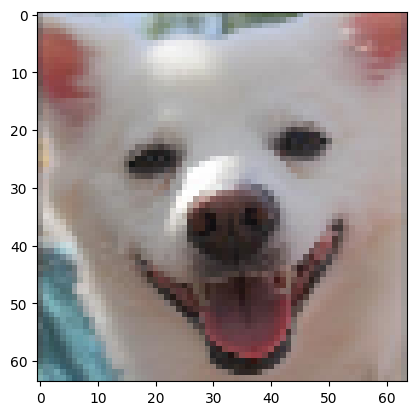

In [ ]:

# prinitng
#visualizing one of the preprocessed images and printing its shape:
plt.imshow(imagesArray[8])
print(imagesArray[1].shape)

# check the number of images in array and shape

In [ ]:

print("the total number of images is: ",len(imagesArray))


the total number of images is:  15921


In [ ]:
x_images = np.array(imagesArray) # This line converts the imagesArray (a list of preprocessed images) into a NumPy array and assigns it to the variable x_images. By doing this, you are creating a NumPy array where each element represents an image.
y_labels =  np.array(labels)# to read it as array
# the point is to is to ensure that it's in a format that is compatible with machine learning libraries and tools. This enables you to build, train, and evaluate machine learning models using your image data and associated labels.

Before:
imagesArray: This was a Python list that contained preprocessed images. Each element in the list represented an image, but in list form. Each image was represented as a NumPy array itself (likely with a shape like (64, 64, 3) if you've resized your images to 64x64 pixels and converted them to RGB). The list elements were separate images, and you could access them using indexing, e.g., imagesArray[0] would be the first image in the list.

After:
This array now represents the image data. Each element of the array is a NumPy array itself, where each sub-array represents an image. The shape of x_images would typically be (num_images, height, width, channels), where num_images is the number of images in your dataset, height and width represent the dimensions of each image (e.g., 64x64 pixels in your case), and channels is the number of color channels (typically 3 for RGB images).

For example, if x_images has a shape of (100, 64, 64, 3), it means you have 100 images, each of size 64x64 pixels with 3 color channels (RGB).

In [ ]:
print(x_images.shape) # to check the shape for the array that stores the images
print(y_labels.shape) # to check the shape for the array that stores the labels

(15921, 64, 64, 3)
(15921,)


# Split to train, test, validation

When working with images for deep learning, we need both the images themselves, usually denoted as X, and also, correct labels for these images, usually denoted as Y. Furthermore, we need X and Y values both for training the model, and then, a separate set of X and Y values for validating the performance of the model after it has been trained. Therefore, we need 4 segments of data for the  dataset:

x_train: Images used for training the neural network
y_train: Correct labels for the x_train images, used to evaluate the model's predictions during training
x_valid: Images set aside for validating the performance of the model after it has been trained
y_valid: Correct labels for the x_valid images, used to evaluate the model's predictions after it has been trained

In [ ]:
# are first defined as the desired proportions
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set

X_train, X_test, y_train, y_test = train_test_split(x_images, y_labels, test_size=1 - train_ratio,random_state=99)
#train_test_split is a function from a library like scikit-learn that randomly splits the dataset into training and testing sets.
#random_state is set to 99 for reproducibility. It ensures that the data is split in the same way if you run the code again
#test_size is set to 1 - train_ratio, which means that the training set will be 75% of the entire dataset (as specified by train_ratio), and the remaining data will be the testing set.

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))
#test_size is set to test_ratio / (test_ratio + validation_ratio). This means that the validation set will be 15% of the initial dataset, and the final testing set will be 10%.


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (11940, 64, 64, 3)
X_test shape: (1593, 64, 64, 3)
y_train shape: (11940,)
y_test shape: (1593,)
X_val shape: (2388, 64, 64, 3)
y val shape: (2388,)


In [ ]:
# (normalization) make the pixels of image range between 0 and 1 that leads to faster training and increase the acc
X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/  255.0

In [ ]:
#one-hot-encoding
y_train = tf.keras.utils.to_categorical(y_train) #This line takes the training labels y_train, which are originally class labels (e.g., "angry," "happy," "relaxed," "sad"), and converts them into one-hot encoded vectors.
y_val = tf.keras.utils.to_categorical(y_val)
# One-hot encoding is often used when dealing with categorical data for classification tasks in machine learning. It allows the model to understand that the labels are not ordinal or continuous values but rather distinct categories. The resulting one-hot encoded vectors are typically used as target labels when training deep learning models for classification
# One-hot encoding is a way to represent categorical data, where each category is represented as a binary vector. Each element in the vector corresponds to a category, and it is set to 1 if the data point belongs to that category and 0 otherwise. In this case, you're converting the emotion labels into one-hot encoded vectors, so each emotion is represented as a binary vector.

In [ ]:
print(y_train.shape)
print(y_test.shape)

(11940, 4)
(1593,)


In [ ]:
# build the model with Resnet50(base)
ResNet50_Model = ResNet50( #This line creates a ResNet-50 model with the following settings:
        weights='imagenet', #p
        include_top=False, #excludes the top (fully connected) layers of the original ResNet-50 model, allowing you to add your own layers on top.(so that i can add the ones below)
        input_shape=(64,64,3) #: Specifies the input shape for your images, which is set to 64x64 pixels with 3 color channels (RGB).
    )
ResNet50_Model.trainable=False # make the weights fixed
model = Sequential() #This line initializes a Keras Sequential model, which is a linear stack of layers. (sequential=each layer takes from the layer before it)
model.add(ResNet50_Model) # It adds the pre-trained ResNet-50 model to my custom model.
model.add(layers.GlobalAveragePooling2D()) #  adds a layer to your neural network that performs a global average pooling operation, which simplifies the spatial dimensions of the feature maps produced by the preceding layers into a single value for each feature map, creating a compact representation of the features. This is often used before the final classification layer to reduce the number of parameters and make the model more robust.
model.add(layers.Dropout(0.2 )) #20% dropout rate. Dropout is a regularization technique that helps prevent overfitting by randomly deactivating a fraction of neurons during training.
model.add(layers.Dense(4, activation='softmax')) #This adds the -output layer- with: 4 units (since you have 4 categories for your image classification task) and a softmax activation function, which is common for multi-class classification. It will produce probability distributions over the 4 classes.

model.compile( #This line compiles the model with the specified settings
        loss='categorical_crossentropy', #specifying the loss function to be used during the training of your neural network. Specifically, it's using "categorical cross-entropy" as the loss function ++ The softmax activation function outputs class probabilities, which are suitable for calculating the categorical cross-entropy loss.
        metrics=[['accuracy'],  tf.keras.metrics.Precision(), #The model's metrics:
                              tf.keras.metrics.Recall()]
    )

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23595908 (90.01 MB)
Trainable params: 8196 (32.02 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


# Train the model

In [ ]:
#training your neural network model:
history = model.fit(
    X_train, y_train, epochs=20, verbose=1,batch_size=64, validation_data=(X_val, y_val) # The number of epochs is the number of times your model will go through the entire training datase
)
#The batch size specifies how many data points are used in each forward and backward pass during training. 

Epoch 1/20
187/187 [==============================] - 28s 48ms/step - loss: 1.3608 - accuracy: 0.3121 - precision: 0.3182 - recall: 5.8626e-04 - val_loss: 1.3373 - val_accuracy: 0.3296 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
187/187 [==============================] - 6s 33ms/step - loss: 1.3425 - accuracy: 0.3290 - precision: 0.4583 - recall: 9.2127e-04 - val_loss: 1.3353 - val_accuracy: 0.3245 - val_precision: 0.3333 - val_recall: 0.0013
Epoch 3/20
187/187 [==============================] - 6s 30ms/step - loss: 1.3376 - accuracy: 0.3397 - precision: 0.5060 - recall: 0.0035 - val_loss: 1.3310 - val_accuracy: 0.3409 - val_precision: 0.2857 - val_recall: 8.3752e-04
Epoch 4/20
187/187 [==============================] - 6s 34ms/step - loss: 1.3332 - accuracy: 0.3486 - precision: 0.5200 - recall: 0.0054 - val_loss: 1.3287 - val_accuracy: 0.3568 - val_precision: 0.3158 - val_recall: 0.0025
Epoch 5/20
187/187 [==============================] - 5s 27ms/step - loss: 1.33

In [ ]:
results = pd.DataFrame(history.history)  # built-in attribute returned by the model.fit
#The history.history dictionary contains metrics like loss and accuracy for both the training and validation sets for each epoch.
results.tail()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
15,1.323600,0.364992,0.508621,0.014824,1.319758,0.371441,0.432432,0.006700
16,1.322411,0.363317,0.512894,0.014992,1.324734,0.371859,0.416667,0.004188
17,1.323158,0.362730,0.531722,0.014740,1.321807,0.366834,0.387097,0.005025
18,1.320382,0.367588,0.516575,0.015662,1.321310,0.369765,0.428571,0.005025
19,1.321799,0.364908,0.543103,0.015829,1.320139,0.378978,0.375000,0.005025


In [ ]:
y_test = tf.keras.utils.to_categorical(y_test) #One-hot-encoding
model.evaluate(X_test, y_test)

50/50 [==============================] - 2s 25ms/step - loss: 1.3296 - accuracy: 0.3603 - precision: 0.5333 - recall: 0.0100


[1.329628825187683,
 0.3603264391422272,
 0.5333333611488342,
 0.010043942369520664]

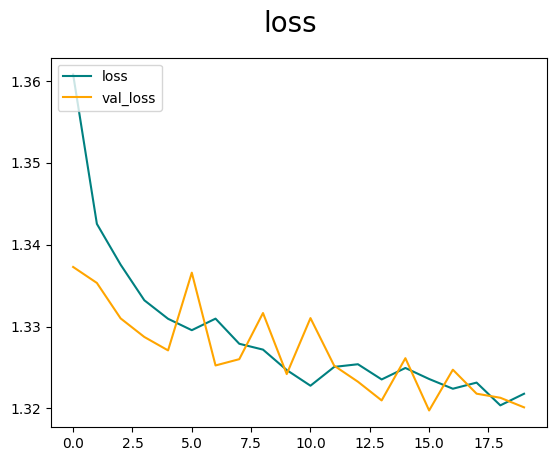

In [ ]:
# plot performance
fig=plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()
# loss down val rising up = overvitting

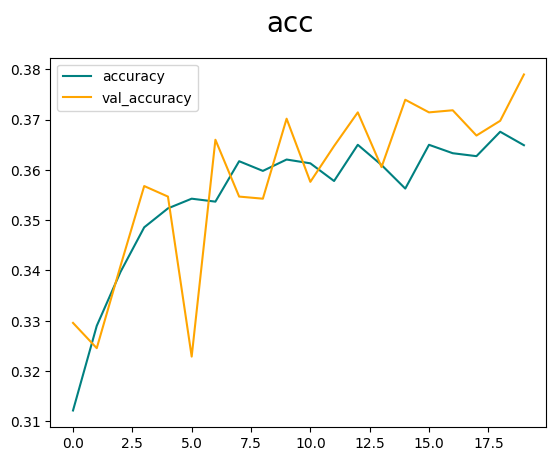

In [ ]:
# plot performance
fig=plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('acc',fontsize=20)
plt.legend(loc="upper left")
plt.show()

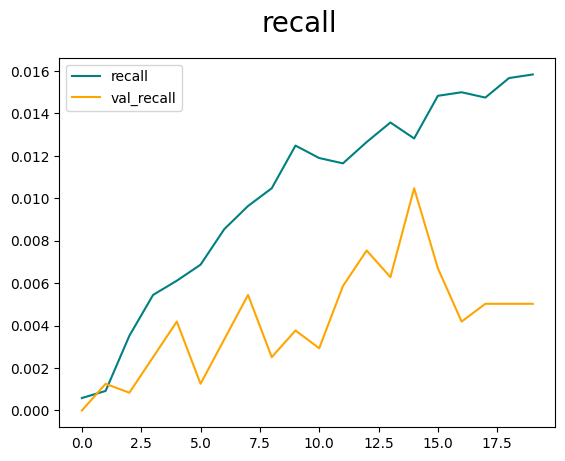

In [ ]:
# plot performance
fig=plt.figure()
plt.plot(history.history['recall'],color='teal',label='recall')
plt.plot(history.history['val_recall'],color='orange',label='val_recall')
fig.suptitle('recall',fontsize=20)
plt.legend(loc="upper left")
plt.show()

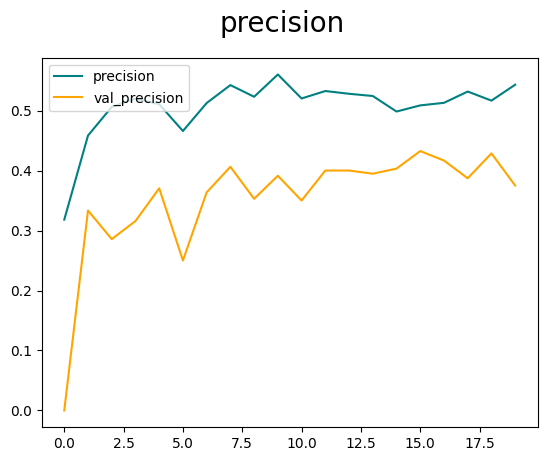

In [ ]:
# plot performance
fig=plt.figure()
plt.plot(history.history['precision'],color='teal',label='precision')
plt.plot(history.history['val_precision'],color='orange',label='val_precision')
fig.suptitle('precision',fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Fine-Tuning the Model

Now that the new layers of the model are trained, we have the option to apply a final trick to improve the model, called fine-tuning. To do this we unfreeze the entire model, and train it again with a very small learning rate. This will cause the base pre-trained layers to take very small steps and adjust slightly, improving the model by a small amount.

In [ ]:
# Unfreeze the base model
ResNet50_Model.trainable = True #to allow updating.(From the fixed weights of imageNet)

# It's important to recompile your model after you make any changes
# After unfreezing the layers, you need to recompile your model with the new training settings:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=[keras.metrics.CategoricalAccuracy()])

In [ ]:
history_Fine_Tuning = model.fit(
    X_train, y_train, epochs=3, validation_data=(X_val, y_val)
)

Epoch 1/3
374/374 [==============================] - 64s 63ms/step - loss: 2.1833 - categorical_accuracy: 0.3662 - val_loss: 52.7798 - val_categorical_accuracy: 0.3036
Epoch 2/3
374/374 [==============================] - 22s 58ms/step - loss: 1.2492 - categorical_accuracy: 0.5095 - val_loss: 2.6585 - val_categorical_accuracy: 0.3350
Epoch 3/3
374/374 [==============================] - 22s 59ms/step - loss: 0.9739 - categorical_accuracy: 0.6117 - val_loss: 1.3780 - val_categorical_accuracy: 0.4585


# Result after Fine Tuning

In [ ]:
model.evaluate(X_test, y_test)

50/50 [==============================] - 1s 18ms/step - loss: 1.4345 - categorical_accuracy: 0.4281


[1.4344919919967651, 0.42812302708625793]

In [ ]:
model.save(os.path.join('/content/Model','Model.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing

In [ ]:

img=cv2.imread("/content/images/2/10020196973_c062e5786a_b.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(64,64))
img=img.reshape(-1,64,64,3)
img=img/255

In [ ]:
preds = model.predict(img)

1/1 [==============================] - 1s 1s/step


In [ ]:
print(preds)

[[0.0062104  0.0028725  0.8278312  0.16308594]]


In [ ]:
predicted_class_index = np.argmax(preds)
print("this is: ",CATEGORIES[predicted_class_index])

this is:  relaxed
